#### DataCamp

#### GARCH Models in Python -- Chelsea Yang

#### GARCH (Generalised AutoRegressive Conditional Heteroskedasticity)

Popular approach to model volatility.

#### Volatility
It is a statistical measure of the dispersion of financial asset returns over time.

It is computed as the standard deviation (or variance) of price returns.

It describes uncertainties surrounding the potential price movement of financial assets. It is an essential concept widely used in risk management, portfolio optimisation and more. It is one of the most active areas of research in empirical finance and time series analysis.

In general, higher the volatility, riskier the financial asset.

Volatility is computed as follows:
- Calculate returns as a percentage price change.
`return_data = price_data.pct_change()`
- Calculate the (sample) mean return for a fixed period.
- Calculate the (sample) standard deviation for that fixed period. This is volatility.
$\sigma_d$ = `volatility = return_data.std()`

Computing monthly volatility from daily volatility:
$\sigma_m = \sqrt{21} \times \sigma_{d}$  
The average number of trading days in a month is 21.

Computing annual volatility from daily volatility:
$\sigma_a = \sqrt{252} \times \sigma_d$  
The average number of trading days in a year is 252.

A common assumption in time series modelling is that volatility remains constant over time (homoskedasticity). However, heteroskedasticity is frequently observed in financial return data as volatility tends to increase or decrease systematically over time. A straightforward way to determine the presence of heteroskedasticity in a time series is to plot the data and observe its behaviour over time. Heteroskedastic data exhibits time-dependent fluctuations.

VIX (Volatility Index) derived from S&P 500 option prices is a barometer of the US stock market's expected volatility and risk sentiment. VIX demonstrates "volatility clustering", periods of high or low volatility tend to persist. Large price changes are more likely to be followed by more large price changes and vice-versa. Volatility clustering happends because markets tend to respond to new information shocks iwth dramatic price movement and it takes time for the shocking effect to resolve and dissipate.



In [2]:
import pandas as pd

In [ ]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())

# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [3]:
sp_price = pd.read_csv('SP500.csv', index_col='Date')
sp_price.index = pd.to_datetime(sp_price.index)
display(sp_price.head())
display(sp_price.tail())

,Close,Return
Date,,
2010-07-01,1027.37,-0.324048
2010-07-02,1022.58,-0.466239
2010-07-06,1028.06,0.535899
2010-07-07,1060.27,3.133086
2010-07-08,1070.24,0.940327


,Close,Return
Date,,
2019-10-04,2952.01,1.421685
2019-10-07,2938.79,-0.447830
2019-10-08,2893.06,-1.556083
2019-10-09,2919.40,0.910455
2019-10-10,2938.13,0.641570


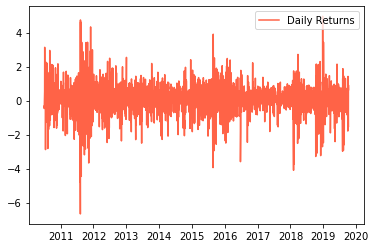

In [5]:
import matplotlib.pyplot as plt

# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

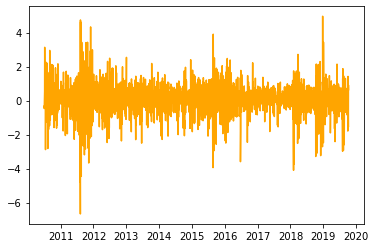

Daily volatility:  0.92%
Monthly volatility:  4.20%
Annual volatility:  14.54%


In [6]:
import math

# Plot the price returns
plt.plot(sp_price['Return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Recall:
- White Noise Process: Sequence of random variables that cannot be predicted.
- White Noise ($z$): Uncorrelated random variables with a zero mean and finite variance. The random variables are independent and identically distributed with a mean of zero.
- Residual: Predicted Value - Observed Value. =Observed Value - Predicted Value???
- If the prediction model is working properly, successive residuals are uncorrelated with each other, i.e., they constitute a white noise time series. In other words, the model has taken care of all the predictable components and left only the unpredictable white noise part.

We want to predict the return $r_t$ at time $t$ using the information at time $t-1$.  
Expected return $\mu_t = E[r_t|I(t-1)]$
$r_t = \mu_t + \epsilon_t$

Expected volatility $\sigma_t^2 = E[(r_t - \mu_t)^2|I(t-1)]$  
$\epsilon_t = \sigma_t \times \zeta(\text{White Noise})$, where $\zeta$ is a rv that comes from a white noise process.

#### ARCH (AutoRegressive Conditional Heteroskedasticity)

Conditional Heteroskedasticity refers to the fact that the data has time-dependent varying characteristic and unpredictability.

For ARCH models, (current) variance is written as a weighted average of (up to) $p$ lags of (past) squared-residuals.

$ARCH(1): \sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2$  
$ARCH(p): \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2$  

#### GARCH (Generalised AutoRegressive Conditional Heteroskedasticity)

For GARCH models, (current) variance is written as a weighted average of the lags of squared-residuals and also (up to) $q$ lags of (past) variances.

$GARCH(1,1): \sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$  
$GARCH(p, q): \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2$

Intuition for GARCH models:
- Autoregressive: predict future behaviour based on past behaviour.
- Volatility as a weighted average of past information.

GARCH(1,1) parameter constraints. To make the GARCH(1,1) process realistic, it requires:
- All parameters ($\omega, \alpha, \beta$) are non-negative so the variance cannot be negative.
- Model estimations are "mean-reverting" to the long-run variance, i.e., $\alpha + \beta < 1$. Note that the long-run variance = $\frac{\omega}{1 - \alpha - \beta}$.

Intuitively, GARCH variance forecast can be interpreted as a weighted average of three different variance forecasts. One is a constant variance that corresponds to the long run average. The second is the new information that was not available when the previous forecast was made. The third is the forecast that was made in the previous period. The weights on these three forecasts determine how fast the variance changes with new information and how fast it reverts to its long run mean.

GARCH(1,1) parameter dynamics:
- The larger the value of $\alpha$, the bigger the immediate impact of the shocks. Here the shocks are expressed as residuals, or prediction errors.
- If $\alpha$ is fixed, the larger the $\beta$, the longer the duration of the impact, i.e., high or low volatility periods tend to persist.

In this exercise, you will simulate an $ARCH(1)$ and $GARCH(1,1)$ time series respectively using a predefined function `simulate_GARCH(n, omega, alpha, beta = 0)`.

Recall the difference between an $ARCH(1)$ and a $GARCH(1,1)$ model is: besides an autoregressive component of  multiplying lag-1 residual squared, a GARCH model includes a moving average component of  multiplying lag-1 variance.

The predefined function will simulate an ARCH/GARCH series based on the values of `n` (number of simulations), `omega`, `alpha`, and `beta` (0 by default) you specify. It will return simulated residuals and variances. Afterwards you will plot and observe the simulated variances from the ARCH and GARCH process.

In [7]:
# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = .1, alpha = .7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = .1, alpha = .7, 
                                             beta = .1)
# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

NameError: name 'simulate_GARCH' is not defined



As you can see, overall GARCH model generated higher volatility estimates due to the additional moving average component.





As you can see, overall GARCH model generated higher volatility estimates due to the additional moving average component.

In [ ]:
# First simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = .1, 
                                          alpha = .3, beta = .2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = .1, 
                                          alpha = .3, beta = .6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

Notice the second simulated GARCH time series has bigger variances in general. The shock that occurred earlier had persistent impact on later data points.

#### Implementing GARCH models

Three-step process:
- Specify model assumptions
- Fit the model
- Make a forecast

In [8]:
from arch import arch_model

# Specify the model assumptions

# Distribution of the residuals: normal [default], t, skewt.
# Mean model: constant [default], zero, AR. Constant is common for most of the liquid financial asset returns.
# Volatility model: GARCH [default], ARCH, EGARCH

gm_model = arch_model(sp_price['Return'], p=1, q=1,
                      mean='constant', vol='GARCH', dist='normal')

/home/shuvra/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8391. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


Iteration:      4,   Func. Count:     34,   Neg. LLF: 2783.005885607893
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2771.988661180097
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2771.9638282471406
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2771.9638282463875
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
mu          0.077239
omega       0.039587
alpha[1]    0.167963
beta[1]     0.786467
Name: params, dtype: float64
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                    

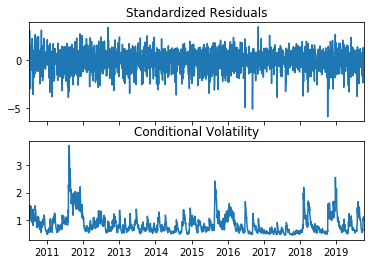

In [9]:
# Fit the model

# The model parameters omega, alpha, beta are estimated using the maximum likelihood method, i.e., the
# parameter values chosen for this GARCH model are the ones which are most likely to have generated the
# observed time series data.

gm_result = gm_model.fit(update_freq=4) # display model fitting output after every 4 iterations
#gm_result = gm_model.fit(disp='off') # turn off display

print(gm_result.params) # prints parameters mu, alpha, omega, beta

print(gm_result.summary())

gm_result.plot()
plt.show()

In [10]:
# Make a forecast

gm_forecast = gm_result.forecast(horizon=5) # make a 5-period ahead forecast
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994079  0.988366  0.982913  0.977708  0.972741


h.1 is the 1-step ahead forecast and h.5 is the 5-step ahead forecast.  
The output is aligned so that the Date (index) column is the final data used to generate the forecast.
More specifically, the h.1 forecast in the above output is the 1-step forecast made using data up to and including that date (2019-10-10).

In [11]:
help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y, x=None, mean='Constant', lags=0, vol='Garch', p=1, o=0, q=1, power=2.0, dist='Normal', hold_back=None, rescale=None)
    Convenience function to simplify initialization of ARCH models
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name of the mean model.  Currently supported options are: 'Constant',
        'Zero', 'ARX' and  'HARX'
    lags : int or list (int), optional
        Either a scalar integer value indicating lag length or a list of
        integers specifying lag locations.
    vol : str, optional
        Name of the volatility model.  Currently supported options are:
        'GARCH' (default), 'ARCH', 'EGARCH', 'FIARCH' and 'HARCH'
    p : int, optional
        Lag order of the symmetri

### GARCH model configurations

#### GARCH model assumptions
- Distribution assumptions
- Mean model specifications
- Volatility models for asymmetric shocks

#### Rolling window forecast

#### Distribution assumptions

We need to make assumptions because volatility is not a directly observable quantity and is estimated through price return fluctuations. GARCH models use residuals as volatility shocks: $r_t = \mu_t + \epsilon_t$ and residuals are a stochastic return shocks dependent on the size of the volatility: $\epsilon_t = \sigma_t \times \zeta(\text{White Noise})$. Therefore, to model volatility GARCH models require making distribution assumptions of both the residuals and mean returns.

To define a good model, the assumptions must be representative of the actual data.

#### Standardised residuals

- Residual: $\epsilon_t = r_t - \mu_t$ = predicted return - mean return
- Standardised residual = $\dfrac{\epsilon_t}{\sigma_t}$ = residual / model estimated return volatility

By default, GARCH models assume a normalised distribution for the standardised residuals, but the financial world is rarely that well-behaved. In Python, the GARCH model residuals can be accessed from the fitted model result by `resid` and the GARCH volatility can be accessed by `conditional_volatility`. Hence, the standardised residuals are calculated as model residuals divided by conditional volatility.  
`gm_std_resid = gm_result.resid / gm_result.conditional_volatility`

We can also plot a histogram of the standardised residuals to review its distribution curve.  
`plt.hist(gm_std_resid, facecolor='orange', label='standardised residuals')  `
These distribution curves of price retunrs often exhibit fat tails, i.e., there is a higher probability (than under a normal distribution) to observe very large returns (either positive or negative). The distribution curves also tend to exhibit skewness. Negative skew (left skew) means the left tail of the distribution curve is longer and so the mass of the distribution is concentrated on the right.

As a result, to improve the GARCH models (and make it catered towards financial data), we can specify the distribution assumption to be Student's t-distribution. The larger the value of the parameter $\nu$ associated to the distribution, the curve is more peaked and has flatter tails. In python, we can do this as follows:  
`gm_model = arch_model(data['Column'], p=1, q=1, mean='constant', vol='GARCH', dist='t')`  
We can find the $\nu$ values in the 'Distribution' section of the model summary.

In a similar way, we can set the distribution to be a skewed t-distribution. In python, we do as follows:  
`gm_model = arch_model(data['Column'], p=1, q=1, mean='constant', vol='GARCH', dist='skewt')`  
In addition to $\nu$, we also have a parameter $\lambda \in [-1, 1]$ to indicate skewness. $\lambda = 0$ refers to a symmetric distribution (and hence the usual Student's t-distribution, $\lambda < 0$ refers to a negatively skewed distribution and $\lambda > 0$ refers to a positively skewed distribution.

In [12]:
import numpy as np

# Creating a standard normal distribution to compare with the standardised residuals
normal_resid = np.random.normal(0, 1, 2336)

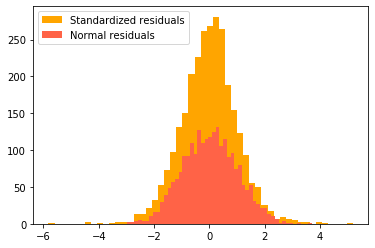

In [72]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
sp_gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.hist(sp_gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.hist(normal_resid, bins = 50, 
         facecolor = 'tomato', label = 'Normal residuals')
plt.legend(loc = 'upper left')
plt.show()

Datacamp Output:


Notice that compared with a standard normal distribution, the distribution curve of standardized residuals from the GARCH models exhibits more peaks, asymmetry, and has a negative skew.

/home/shuvra/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8391. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


Iteration:      1,   Func. Count:      8,   Neg. LLF: 2706.3502661449197
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2703.835160253241
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2702.0328843008933
Iteration:      4,   Func. Count:     39,   Neg. LLF: 2693.036040435167
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2692.9296332752165
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2692.547030377584
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2691.153296753504
Iteration:      8,   Func. Count:     78,   Neg. LLF: 2690.518512832462
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2690.1258860959215
Iteration:     10,   Func. Count:     94,   Neg. LLF: 2689.9963211906706
Iteration:     11,   Func. Count:    103,   Neg. LLF: 2689.9902886994337
Iteration:     12,   Func. Count:    112,   Neg. LLF: 2689.983754391247
Iteration:     13,   Func. Count:    120,   Neg. LLF: 2689.980488097558
Iteration:     14,   Func. Count:    128,   Neg. LLF: 2689

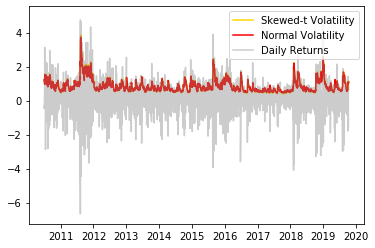

In [14]:
# Modelling with a skew

# Specify GARCH model assumptions
skewt_gm = arch_model(sp_price['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(gm_std, color = 'red', label = 'Normal Volatility')
plt.plot(sp_price['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

As you can see with skewed Student’s t-distribution assumption, GARCH model estimation is more in line with the actual observations.

#### Mean model specifications

By default, GARCH models assume a `constant` mean which generally works well with most financial asset data. 

We can also specify a `zero` mean assumption--this is used if the mean of the time series has been modelled separately by another process such as ARMA models and we are using residuals from that model to estimate volatility. Many practitioners prefer this approach of separating the process of mean and volatility modelling. Typically the mean assumptions influence predicted returns, but have a minor effect on the volatility estimations.

In addition, we can choose to model the mean as an `AR` process, so the current mean is correlated with the previous data. To implement this, we also need to specify the `lags`, e.g.,  
`arch_model(data['Column'], p=1, q=1, mean='AR', lags=1, vol='GARCH')`.

In this exercise, you will examine the impact of GARCH model mean assumptions on volatility estimations by comparing two GARCH models. They have been defined with different mean assumptions and fitted with S&P 500 data.

The model with "constant mean" assumption has results saved in `cmean_result`, and estimated volatility saved in `cmean_vol`. The model with "AR(1)" or 1-lag autoregressive mean assumption has results saved in `armean_result`, and estimated volatility saved in `armean_vol`.

In [36]:
cmean_model = arch_model(sp_price['Return'], p=1, q=1, mean='constant', vol='GARCH')
cmean_result = cmean_model.fit(disp='off')
cmean_vol = cmean_result.conditional_volatility[1:]

armean_model = arch_model(sp_price['Return'], p=1, q=1, mean='AR', lags=1, vol='GARCH')
armean_result = armean_model.fit(disp='off')
armean_vol = armean_result.conditional_volatility[1:]

/home/shuvra/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8391. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
/home/shuvra/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.8376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Wed, Dec 02 2020   Df Residuals:                     2332
Time:                        19:35:28   Df Model:                            4
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

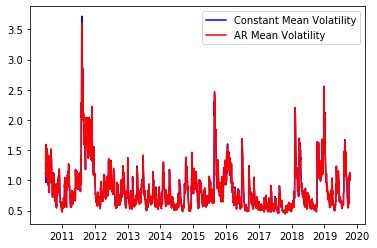

0.9993806540119627


In [37]:
# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
print(armean_result.summary())

# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

The correlation coefficient is close to 1, and the plot shows volatility estimation from both models are very close. In fact, the impact of the mean model assumptions on volatility estimation is so small that, if the interest is only in the volatility dynamics, usually one can just assume the most simple specification, namely the constant mean model.

#### Volatility models for asymmetric shocks

So far, GARCH models assume symmetric shocks on volatility, i.e., positive or negative changes in price returns would have the same impact on volatility. We will discuss how to model the asymmetric shocks on volatility which help address the case when the above assumption doesn't hold.

In the real financial world, the market "tends to take the stairs up and the elevators down"--prices go up slowly and steadily in good times and prices take a sharp plunge in a financial crisis.

The leverage effect refers to the observed tendency of an asset's volatility to be negatively correlated with the asset's return. Typically, rising stock prices are accompanied by declining volatility and vice-versa. An economic explanation of this phenomenon is: As stock prices decline, the companies debt-equity ratio (which is equal to their debt divided by their equity) goes up and they become more leveraged, and thus they become riskier assets.

GJR-GARCH has been developed to address the asymmetric shock effect on volatility. It adds a conditional parameter $\gamma$ (which gets added when the return shocks are negative to account for the additional impact) to the standard GARCH model equation.  
$$\sigma_t^2 = \omega + (\alpha + \gamma I_{t-1}) \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$$

\begin{equation*}
    I_{t-1} := \begin{cases}
               0 &\quad \text{if } r_{t-1} \geq \mu,\\
               1 &\quad \text{if } r_{t-1} < \mu.
          \end{cases}
\end{equation*}

GJR_GARCH is implemented in Python by adding a parameter `o=1`.  
`arch_model(data['Column'], p=1, q=1, o=1, mean='constant', vol='GARCH')`

Another popular model to address the asymmetric shock effect is the Exponential GARCH (EGARCH) model. It is called so as it is based on log-variance instead of variance. What it does is add a conditional component to model the asymmetry in shocks similar to the GJR-GARCH. Further, since it is based on log-variance there are no non-negative constraints on $\alpha, \beta$, it runs faster for likelihood maximisation during model fitting.

EGARCH is implemented in Python by adding the parameter `o=1` and specifying `vol='EGARCH'`.  
`arch_model(data['Column'], p=1, q=1, o=1, mean='constant', vol='EGARCH')`


In [38]:
bitcoin_data = pd.read_csv('bitcoin.csv', index_col='Date')
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

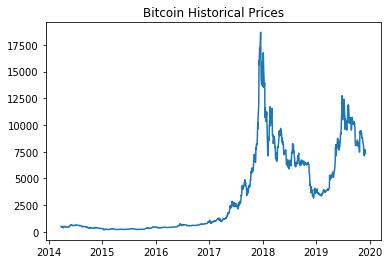

In [41]:
plt.plot(bitcoin_data['Close'])
plt.title('Bitcoin Historical Prices')
plt.show()

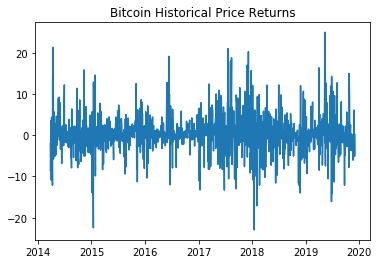

In [42]:
plt.plot(bitcoin_data['Return'])
plt.title('Bitcoin Historical Price Returns')
plt.show()

In [43]:
#GJR-GARCH

# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Wed, Dec 02 2020   Df Residuals:                     1477
Time:                              21:19:41   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [44]:
# EGARCH

# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Wed, Dec 02 2020   Df Residuals:                     1477
Time:                              21:20:57   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

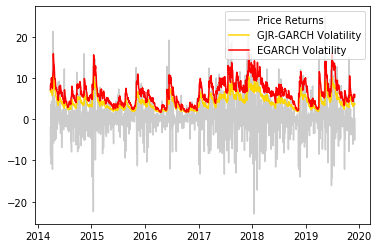

In [45]:
# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_result.conditional_volatility, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_result.conditional_volatility, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

Comparatively, GJR-GARCH is more conservative in volatility estimation when applying it to the Bitcoin dataset.

#### Rolling window forecast

Rolling window forecast: We use in-sample data for model fitting, perform 1-period ahead out-of-sample forecast and do this repeatedly as time rolls forward.

Motivations of rolling window forecast:
- Avoid lookback bias: When we use all the data to fit a model, the model estimation has lookback bias. Since in reality, we do not know the future, the time series data for model fitting and forecast should not overlap.
- Less subject to overfitting: An implicit time series modelling assumption is that model parameters are stable over time but this barely holds true in turbulent market environment. suppose we were trying to fit a GARCH(1,1) with observations from an economic crisis versus normal market conditions, we are very likely to obtain very different values of the parameters $\omega, \alpha, \beta$.
- Adapt forecast to new observations: The rolling window approach can better adapt our forecast to changes by continuously incorporating new observations to the model fitting and forecast. Thus, we are more responsive to the most recent economic conditions, news, economic cycles, etc.

There are two ways to do a rolling window forecast:
1. Expanding window forecast: Start with sample data and as time moves forward, continuously adds new data points to the sample data. It always has the same initial observation. The default value of `first_obs` is the first observation in the sample data.

In Python, we can implement it as follows:  
    `for i in range(100):
        gm_result = gm_model.fit(first_obs = start_loc, last_obs = end_loc + i, disp='off')
        temp_result = gm_result.forecast(horizon=1).variance`

2. Fixed window forecast: Start with sample data and as time moves forward, new data points are added to the sample data but the oldest data points are also dropped from the sample data simultaneously to maintain a fixed window size.

In Python, we can implement it as follows:  
    `for i in range(100):
        gm_result = gm_model.fit(first_obs = start_loc + i, last_obs = end_loc + i, disp='off')
        temp_result = gm_result.forecast(horizon=1).variance`

There is no rigid rule for choosing window sizes--it is determined on a case-by-case basis. However, for rolling estimation, different window sizes can lead to very different forecast performances. Too wide window size can include obsolete data leading to higher prediction bias and thus overfitting. Too narrow window size can exclude relevant data leading to higher variance and thus underfitting. Thus, the optimal window size is determined by balancing the bias-variance trade-off.

In [58]:
start_loc = 2081; end_loc = 2201
#start_loc = '2018-10-05'; end_loc = '2019-04-01'
gm_model = arch_model(sp_price['Return'], p=1, q=1, dist='t', vol='GARCH')

Iteration:      5,   Func. Count:     43,   Neg. LLF: 185.946343333218
Iteration:     10,   Func. Count:     79,   Neg. LLF: 185.59513158289968
Iteration:     15,   Func. Count:    115,   Neg. LLF: 185.5395291285148
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 185.53952912851423
            Iterations: 15
            Function evaluations: 115
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     43,   Neg. LLF: 186.06619241651305
Iteration:     10,   Func. Count:     79,   Neg. LLF: 185.90998786612812
Iteration:     15,   Func. Count:    115,   Neg. LLF: 185.82798790434873
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 185.82798627115423
            Iterations: 16
            Function evaluations: 122
            Gradient evaluations: 16
Iteration:      5,   Func. Count:     42,   Neg. LLF: 185.17580505447032
Iteration:     10,   Func. Count:     78,   Neg. LLF: 185.1093327530

Iteration:      5,   Func. Count:     42,   Neg. LLF: 158.75333680538102
Iteration:     10,   Func. Count:     81,   Neg. LLF: 158.62650995538687
Iteration:     15,   Func. Count:    119,   Neg. LLF: 158.24395987864023
Iteration:     20,   Func. Count:    158,   Neg. LLF: 158.0967877340343
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 158.0963181677258
            Iterations: 23
            Function evaluations: 179
            Gradient evaluations: 23
Iteration:      5,   Func. Count:     43,   Neg. LLF: 157.73033950800823
Iteration:     10,   Func. Count:     80,   Neg. LLF: 157.63305449808536
Iteration:     15,   Func. Count:    119,   Neg. LLF: 157.35520510650701
Iteration:     20,   Func. Count:    157,   Neg. LLF: 157.12839022518745
Iteration:     25,   Func. Count:    192,   Neg. LLF: 157.1010192382039
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 157.10101923820037
            Iterations: 

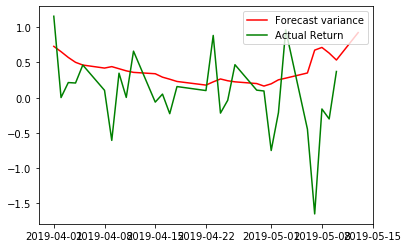

In [59]:
forecasts = {}

for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = gm_model.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a dataframe    
forecast_var = pd.DataFrame(forecasts).T

# Plot the forecast variance
plt.plot(forecast_var, color = 'red', label='Forecast Variance')
plt.plot(sp_price.Return['2019-4-1':'2019-5-10'], color = 'green', label='Actual Return')
plt.legend(loc = 'upper right')

plt.show()

As you can see the model did a decent job: variance predicted by our model fluctuates with the actual returns.

In [60]:
# ??? Check why DataCamp's output graph has such a sudden downward spike in forecast variance at the end.
# Also, check the forecast variance vs the actual variance (how would we compute the actual variance at that point?)

DataCamp ouput:


Different rolling window approaches can generate different forecast results. In this exercise, let's take a closer look by comparing these forecast results.

First, you will use a GARCH model to predict Bitcoin return volatility with an expanding window and a fixed rolling window approach respectively. Then you will plot both forecast results together to visualize the difference.

Variance forecast generated with an expanding window approach is saved in `variance_expandwin`, and that with a fixed rolling window approach is saved in `variance_fixedwin`.

In [ ]:
# Print header of variance forecasts with expanding and fixed window
print(variance_expandwin.head())
print(variance_fixedwin.head())

# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)
# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue')
# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red')
plt.plot(bitcoin_data.Return['2019-4-1':'2019-9-15'], color = 'chocolate')
plt.show()

    <script.py> output:
        Date
        2019-03-29     4.451356
        2019-04-01     4.453030
        2019-04-02    48.281409
        2019-04-03    64.111180
        2019-04-04    69.946163
        Name: var_expandwin, dtype: float64
        Date
        2019-03-29     4.451356
        2019-04-01     4.843826
        2019-04-02    48.625266
        2019-04-03    64.804622
        2019-04-04    70.814004
        Name: var_fixedwin, dtype: float64
        


By comparison, volatility forecast with a fixed rolling window approach is more responsive to recent return shocks than forecast with an expanding window approach.

#### Significance testing of model parameters

In general, we always prefer a parsimonious model--it can do a good job explaining the data with the minimum number of parameters.

Hypothesis tests can be done to decide whether to keep or drop a model parameter. Typically, the null hypothesis is that the parameter value is 0. Gnerally, the significance level is set to 0.05, i.e., the threshold for the probability of observing the results in our data by chance is 5%.

Statistical significance helps quantify the observed results by chance.

p-value is the probability of obtaining the observed results of a test assuming that the null hypothesis is true. In other words, it tells us the probability that the observed results could have happened by chance. Hence, the lower the p-value, the more surprising the evidence and hence, the more improbable the null hypothesis. As a result, we reject the null hypothesis if the p-value is less than the significance level.

We can view the GARCH model p-values in the model fitting summary `gm_result.summary()` or print out `gm_result.pvalues`.

Another measure from the statistical significance test is $t$-statistic.

The $t$-statistic is equal to $\frac{\text{Estimated parameter value} - \text{Expected mean vlaue}}{\text{Standard error}}$.  
Since our null hypothesis assumes that the parameter mean value is 0, the $t$-statistic = $\frac{\text{Estimated parameter value}}{\text{Standard error}}$.

The absolute value of the $t$-statistic is a distance measure that tells us how many standard errors the parameter is away from 0. The larger the distance, the more likely the parameter is not 0. Generally, if the $t$-statistic is greater than 2, we can reject the null hypothesis and keep the parameter in the GARCH model. The $t$-statisti can also be viewed in the model fitting summary `gm_result.summary()` or print out `gm_result.tvalues`. Explicitly, it's calculated as follows:  
`t = gm_result.param_value/gm_result.std_err`.

In [63]:
bitcoin_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, mean='constant', vol='EGARCH', dist='t')
bitcoin_gm_result = bitcoin_gm.fit(disp='off')

In [64]:
# Print model fitting summary
print(bitcoin_gm_result.summary())

# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter': bitcoin_gm_result.params,
                             'p-value': bitcoin_gm_result.pvalues})

# Print out parameter stats
print(para_summary)

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Thu, Dec 03 2020   Df Residuals:                     1477
Time:                              00:10:56   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

The p-value of $\gamma$ is larger than 0.05, so the null hypothesis claiming the parameter value is zero cannot be rejected. In this case, an asymmetric GARCH model seems to be an overkill.

In [65]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter': bitcoin_gm_result.params,
                             'std-err': bitcoin_gm_result.std_err, 
                             't-value': bitcoin_gm_result.tvalues})

# Verify t-statistic by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-value
print(calculated_t)

# Print parameter stats
print(para_summary)

mu           3.003344
omega        2.507226
alpha[1]     4.164166
gamma[1]     0.546913
beta[1]     91.011637
nu          16.317001
dtype: float64
          parameter   std-err    t-value
mu         0.155708  0.051845   3.003344
omega      0.219066  0.087374   2.507226
alpha[1]   0.440683  0.105827   4.164166
gamma[1]   0.017079  0.031229   0.546913
beta[1]    0.979645  0.010764  91.011637
nu         2.334183  0.143052  16.317001


The $t$-statistics are in agreement with $p$-values, pointing out that the $\gamma$ parameter is not statistically significant and should be left out of the model.

#### Validation of GARCH model assumptions

GARCH models make strict assumptions about the distribution characteristics of their standardised residuals. If the model is doing a good job explaining the data, the standardised residuals should resemble a white noise process, which does not exhibit data clustering or autocorrelation.

For starters, we can do a visual check by plotting the standardised residuals.

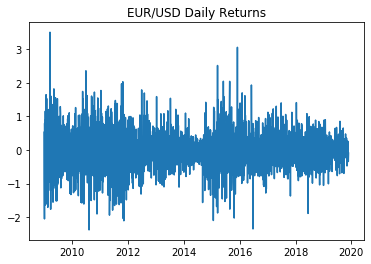

In [68]:
eur_usd = pd.read_csv('eur.csv', index_col='Date')
eur_usd.index = pd.to_datetime(eur_usd.index)

plt.plot(eur_usd['Return'])
plt.title('EUR/USD Daily Returns')
plt.show()

As seen in the chart, the raw return data exhibits clear signs of clustering.

/home/shuvra/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.3321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


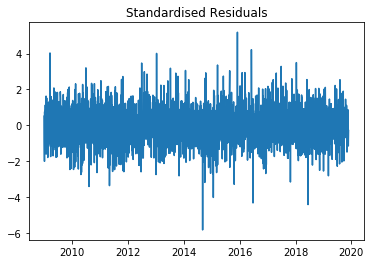

In [129]:
eur_gm_model = arch_model(eur_usd['Return'], p=1, q=1, vol='GARCH')
eur_gm_result = gm_model.fit(disp='off')

eur_gm_std_resid = gm_result.resid / gm_result.conditional_volatility

plt.plot(eur_gm_std_resid)
plt.title('Standardised Residuals')
plt.show()

After fitting the GARCH model, the standardised residuals don't show as much clustering and are close to a random white noise movement.

We can also use auto-correlation to detect non-randomness in the standardised residuals. Recall that autocorrelation is the correlation of a variable with itself given a specific time lag. When there is a pattern such that values in the time series can be predicted based on preceding values in the time series, the data exhibits autocorrelation. Hence, existence of autocorrelation in the standardised residuals indicates that they don't resemble a white noise process and hence the model may not be sound.

To detect autocorrelation, we can use ACF plots or statistical tests such as Ljung-Box test to detect autocorrelations in the data.

Recall that the autocorrelation function (ACF) shows the autocorrelation for all possible lags. And an ACF plot is a visual representation of correlations at different lags. Of course, at lag 0, the correlation is 1 because the data being compared are identical.

In Python:  
`from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Column'], alpha=0.05)`  
The alpha=0.05 denotes that there is only a 5% chance the correlation will fall outside the band even if the true correlation is 0.

**Ljung-Box test**: Tests whether any of a group of autocorrelations of a time series are different from zero.

Instead of testing randomness at each distinct lag, it tests the "overall" randomness based on a number of lags. The Ljung-Box test assumes a null hypothesis that the data is independently distributed. We'll reject the null hypothesis if the p-value is smaller than the specified significance level (usually 5%). Rejection of the null hypothesis implies that the residuals are not independently distributed and hence the model is not adequate.

In Python:  
`from statsmodel.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(std_resid, lags=10)
print('p-values are: ', lb_test[1])`

The argument `lags` specifies the maximum number of lags up to which the test will be performed.

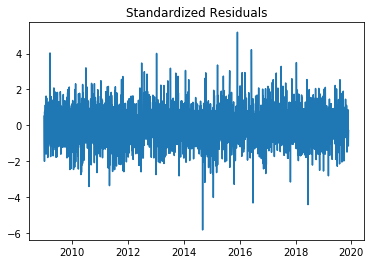

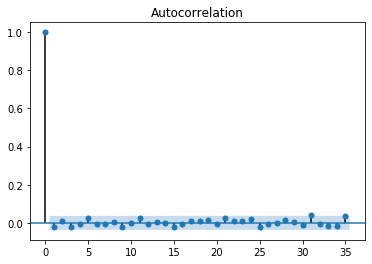

In [70]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf

# Plot the standardized residuals
plt.plot(sp_gm_std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
plot_acf(sp_gm_std_resid, alpha = 0.05)
plt.show()

DataCamp output:





The ACF plot shows the majority of the data points are within the confidence interval, so the model is doing a decent job.

In [75]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(sp_gm_std_resid , lags = 10)

# Print the p-values
print('P-values are: ', lb_test[1])

P-values are:  [0.28976229 0.49044158 0.43534021 0.59217609 0.50304072 0.61128278
 0.71683621 0.80391221 0.73457642 0.80978046]


    <script.py> output:
        P-values are:  [0.20245506 0.44376925 0.64161313 0.67772327 0.16497631 0.22338793
         0.3024051  0.39598811 0.39766542 0.38572791]

All the p-values are larger than 5% so the null hypothesis cannot be rejected. In other words, no autocorrelations detected and the model is doing a decent job.

#### Goodness of fit measures

"Goodness of fit" describes how well a model fits a set of observations. Measures of "goodness of fit" typically summarise the discrepancies between observed values and the values estimated by the model. There are many methods to measure "goodness of fit"; in particular, we'll discuss maximum likelihood method and information criteria.

GARCH models use maximum likelihood method to estimate parameters. Maximum likelihood estimation (MLE) is a method of estimating model parameters by maximising the likelihood function so that it maximises the probability (or the likelihood) of getting the data we have observed under the assumed model. GARCH model log-likelihood values can be reviewed in the model summary or by directly printing `gm_result.loglikelihood`.

Recall that overfitting happens when the model learns the details and noises in the training (in-sample) data, to the extent, that it negatively impacts the performance of the model on new (out-of-sample) data. What happens is that noise or random fluctuations in the in-sample data is picked up and learnt as patterns by the model which does not apply to new information. This usually happens when the model is made very complex to explain the data.

Information criteria intend to measure the trade-off between goodness of fit and model complexity. When fitting models, it is possible to increase likelihood by adding parameters but doing so may result in overfitting. Information criteria consider the model likelihood but also add penalties for model complexity. A model with more parameters will have higher information criteria score given the same likelihood values. AIC and BIC are two commonly used information criteria. They are both used in the context of model selection and models with relatively lower AIC/BIC scores are preferred.

AIC and BIC generally agree with each other. The main difference between the two is the size of the penalty for model complexity with BIC penalising model complexity more severely, hence leading to the choice of more parsimonious models. AIC/BIC values can be reviewed in the model summary or by directly printing `gm_result.aic` or `gm_result.bic`.

Two GARCH models with different distribution assumptions have been defined and fitted with the S&P 500 return data. The normal distribution GARCH is saved in `normal_result`, and the skewed Student's t-distribution GARCH is saved in `skewt_result`.

In [ ]:
# Print normal GARCH model summary
print(normal_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())

# Print the log-likelihodd of normal GARCH
print('Log-likelihood of normal GARCH :', normal_result.loglikelihood)
# Print the log-likelihodd of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

<script.py> output:
                         Constant Mean - GARCH Model Results                      
    ==============================================================================
    Dep. Variable:                 Return   R-squared:                      -0.001
    Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
    Vol Model:                      GARCH   Log-Likelihood:               -2771.96
    Distribution:                  Normal   AIC:                           5551.93
    Method:            Maximum Likelihood   BIC:                           5574.95
                                            No. Observations:                 2336
    Date:                Thu, Dec 03 2020   Df Residuals:                     2332
    Time:                        23:37:41   Df Model:                            4
                                    Mean Model                                
    ==========================================================================
                     coef    std err          t      P>|t|    95.0% Conf. Int.
    --------------------------------------------------------------------------
    mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-02,  0.106]
                                  Volatility Model                              
    ============================================================================
                     coef    std err          t      P>|t|      95.0% Conf. Int.
    ----------------------------------------------------------------------------
    omega          0.0396  9.181e-03      4.312  1.619e-05 [2.159e-02,5.758e-02]
    alpha[1]       0.1680  2.690e-02      6.243  4.284e-10     [  0.115,  0.221]
    beta[1]        0.7865  2.722e-02     28.897 1.303e-183     [  0.733,  0.840]
    ============================================================================
    
    Covariance estimator: robust
                               Constant Mean - GARCH Model Results                           
    =========================================================================================
    Dep. Variable:                            Return   R-squared:                      -0.000
    Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
    Vol Model:                                 GARCH   Log-Likelihood:               -2689.98
    Distribution:      Standardized Skew Student's t   AIC:                           5391.96
    Method:                       Maximum Likelihood   BIC:                           5426.50
                                                       No. Observations:                 2336
    Date:                           Thu, Dec 03 2020   Df Residuals:                     2330
    Time:                                   23:37:41   Df Model:                            6
                                     Mean Model                                 
    ============================================================================
                     coef    std err          t      P>|t|      95.0% Conf. Int.
    ----------------------------------------------------------------------------
    mu             0.0671  1.373e-02      4.882  1.048e-06 [4.013e-02,9.397e-02]
                                  Volatility Model                              
    ============================================================================
                     coef    std err          t      P>|t|      95.0% Conf. Int.
    ----------------------------------------------------------------------------
    omega          0.0252  6.691e-03      3.762  1.682e-04 [1.206e-02,3.829e-02]
    alpha[1]       0.1679  2.551e-02      6.581  4.658e-11     [  0.118,  0.218]
    beta[1]        0.8146  2.493e-02     32.674 3.600e-234     [  0.766,  0.864]
                                    Distribution                               
    ===========================================================================
                     coef    std err          t      P>|t|     95.0% Conf. Int.
    ---------------------------------------------------------------------------
    nu             5.2437      0.575      9.118  7.681e-20    [  4.117,  6.371]
    lambda        -0.0822  2.541e-02     -3.235  1.216e-03 [ -0.132,-3.241e-02]
    ===========================================================================
    
    Covariance estimator: robust
    Log-likelihood of normal GARCH : -2771.9638282462456
    Log-likelihood of skewt GARCH : -2689.9795443723306

The GARCH model with skewed Student's t-distribution assumption has a higher log-likelihood, hence is relatively better.

A GJR-GARCH model and EGARCH model have been defined and fitted with the S&P 500 return data. Their results can be accessed in `gjrgm_result` and `egarch_result` respectively.

In [ ]:
print(gjrgm_result.summary())
print(egarch_result.summary())

# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

<script.py> output:
                          Constant Mean - GJR-GARCH Model Results                       
    ====================================================================================
    Dep. Variable:                       Return   R-squared:                      -0.000
    Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
    Vol Model:                        GJR-GARCH   Log-Likelihood:               -2641.12
    Distribution:      Standardized Student's t   AIC:                           5294.23
    Method:                  Maximum Likelihood   BIC:                           5328.77
                                                  No. Observations:                 2336
    Date:                      Thu, Dec 03 2020   Df Residuals:                     2330
    Time:                              23:41:24   Df Model:                            6
                                     Mean Model                                 
    ============================================================================
                     coef    std err          t      P>|t|      95.0% Conf. Int.
    ----------------------------------------------------------------------------
    mu             0.0554  1.227e-02      4.521  6.163e-06 [3.141e-02,7.949e-02]
                                   Volatility Model                              
    =============================================================================
                     coef    std err          t      P>|t|       95.0% Conf. Int.
    -----------------------------------------------------------------------------
    omega          0.0298  5.609e-03      5.317  1.054e-07  [1.883e-02,4.082e-02]
    alpha[1]   1.8972e-10  2.338e-02  8.114e-09      1.000 [-4.583e-02,4.583e-02]
    gamma[1]       0.3267  4.852e-02      6.733  1.663e-11      [  0.232,  0.422]
    beta[1]        0.8121  2.257e-02     35.978 1.833e-283      [  0.768,  0.856]
                                  Distribution                              
    ========================================================================
                     coef    std err          t      P>|t|  95.0% Conf. Int.
    ------------------------------------------------------------------------
    nu             5.4049      0.613      8.816  1.189e-18 [  4.203,  6.607]
    ========================================================================
    
    Covariance estimator: robust
                            Constant Mean - EGARCH Model Results                        
    ====================================================================================
    Dep. Variable:                       Return   R-squared:                      -0.000
    Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
    Vol Model:                           EGARCH   Log-Likelihood:               -2628.40
    Distribution:      Standardized Student's t   AIC:                           5268.79
    Method:                  Maximum Likelihood   BIC:                           5303.33
                                                  No. Observations:                 2336
    Date:                      Thu, Dec 03 2020   Df Residuals:                     2330
    Time:                              23:41:24   Df Model:                            6
                                     Mean Model                                 
    ============================================================================
                     coef    std err          t      P>|t|      95.0% Conf. Int.
    ----------------------------------------------------------------------------
    mu             0.0493  9.578e-03      5.146  2.663e-07 [3.051e-02,6.806e-02]
                                   Volatility Model                               
    ==============================================================================
                     coef    std err          t      P>|t|        95.0% Conf. Int.
    ------------------------------------------------------------------------------
    omega         -0.0202  7.350e-03     -2.743  6.094e-03 [-3.457e-02,-5.753e-03]
    alpha[1]       0.1707  2.279e-02      7.490  6.874e-14       [  0.126,  0.215]
    gamma[1]      -0.2360  2.598e-02     -9.087  1.019e-19       [ -0.287, -0.185]
    beta[1]        0.9547  9.191e-03    103.869      0.000       [  0.937,  0.973]
                                  Distribution                              
    ========================================================================
                     coef    std err          t      P>|t|  95.0% Conf. Int.
    ------------------------------------------------------------------------
    nu             5.6422      0.644      8.761  1.943e-18 [  4.380,  6.904]
    ========================================================================
    
    Covariance estimator: robust
    AIC of GJR-GARCH model : 5294.232558141419
    AIC of EGARCH model : 5268.791990830911
    BIC of GJR-GARCH model : 5328.769730205107
    BIC of EGARCH model : 5303.3291628946

Both AIC and BIC of the EGARCH model are lower, hence EGARCH is relatively better.

#### GARCH model backtesting

Backtesting is a method to assess the quality of model forecasts ex-post (after the fact). We compare the model predicted results with the actual historical data to see how close they are. A satisfactory backtesting result will give us more confidence in the reliability of model predictions.

Typically, we split our available data into the in-sample data used to fit the model and the out-of-sample data used to evaluate model performance by backtesting.

Backtesting results can be measured by MAE or MSE. We want to minimise both of these as we want to minimise prediction errors.

In Python:  
`from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(observations, forecast)
mse = mean_squared_error(obervations, forecast)`

The actual variance and predicted variance have been preloaded in `actual_var` and `forecast_var` respectively.

    actual_var

Date
2019-06-28    0.284698
2019-07-01    0.525707
2019-07-02    0.062822
2019-07-03    0.525719
2019-07-05    0.049620
2019-07-08    0.276378
2019-07-09    0.006640
2019-07-10    0.167192
2019-07-11    0.034729
2019-07-12    0.176268
2019-07-15    0.000604
2019-07-16    0.146343
2019-07-17    0.483430
2019-07-18    0.099870
2019-07-19    0.435395
2019-07-22    0.057937
2019-07-23    0.412908
2019-07-24    0.182022
2019-07-25    0.323086
2019-07-26    0.485240
2019-07-29    0.041525
2019-07-30    0.090021
2019-07-31    1.278532
2019-08-01    0.887470
2019-08-02    0.593585
2019-08-05    9.120105
2019-08-06    1.586415
2019-08-07    0.001191
2019-08-08    3.363760
2019-08-09    0.495370
2019-08-12    1.532469
2019-08-13    2.056447
2019-08-14    8.829500
2019-08-15    0.041720
2019-08-16    1.961253
2019-08-19    1.365197
2019-08-20    0.694968
2019-08-21    0.612324
2019-08-22    0.008608
2019-08-23    6.952767
2019-08-26    1.115422
2019-08-27    0.131399
2019-08-28    0.375004
2019-08-29    1.504433
2019-08-30    0.000489
2019-09-03    0.535946
2019-09-04    1.085840
2019-09-05    1.584606
2019-09-06    0.002390
2019-09-09    0.002660
2019-09-10    0.000099
2019-09-11    0.463483
2019-09-12    0.060388
2019-09-13    0.013135
2019-09-16    0.126545
2019-09-17    0.046658
2019-09-18    0.000062
2019-09-19    0.001614
2019-09-20    0.282736
2019-09-23    0.002690
Name: Return, dtype: float64

    forecast_var
                 
Date        Var        
2019-06-28  0.450152
2019-07-01  0.470908
2019-07-02  0.428879
2019-07-03  0.452712
2019-07-05  0.415832
2019-07-08  0.418484
2019-07-09  0.378168
2019-07-10  0.363379
2019-07-11  0.334483
2019-07-12  0.327243
2019-07-15  0.300679
2019-07-16  0.301706
2019-07-17  0.351992
2019-07-18  0.332516
2019-07-19  0.371158
2019-07-22  0.343503
2019-07-23  0.365905
2019-07-24  0.354676
2019-07-25  0.373296
2019-07-26  0.400636
2019-07-29  0.369971
2019-07-30  0.351681
2019-07-31  0.508269
2019-08-01  0.584386
2019-08-02  0.606223
2019-08-05  1.862852
2019-08-06  1.805813
2019-08-07  1.543038
2019-08-08  1.785617
2019-08-09  1.604300
2019-08-12  1.601850
2019-08-13  1.654203
2019-08-14  2.712193
2019-08-15  2.309640
2019-08-16  2.236155
2019-08-19  2.094373
2019-08-20  1.890133
2019-08-21  1.693165
2019-08-22  1.448320
2019-08-23  2.268552
2019-08-26  2.081088
2019-08-27  1.795008
2019-08-28  1.582063
2019-08-29  1.559993
2019-08-30  1.336100
2019-09-03  1.231485
2019-09-04  1.206932
2019-09-05  1.255415
2019-09-06  1.080542
2019-09-09  0.933756
2019-09-10  0.809081
2019-09-11  0.763969
2019-09-12  0.671628
2019-09-13  0.589893
2019-09-16  0.540132
2019-09-17  0.481221
2019-09-18  0.426711
2019-09-19  0.381596
2019-09-20  0.390011
2019-09-23  0.352017

In [ ]:
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

# Backtest model with MAE, MSE
evaluate(actual_var, forecast_var)

    <script.py> output:
        Mean Absolute Error (MAE): 0.802
        Mean Squared Error (MSE): 2.37

Note MSE is usually larger than MAE due to the squared effect.

#### Value at Risk (VaR)

Successful investors are always aware of the downside risk of an investment.

VaR is an important concept in financial risk management to quantify the downside risk. It is always discussed with three ingredients:
- portfolio,
- time horizon and
- probability.

The VaR value indicates that given a time horizon, the portfolio is likely to lose at least this much money with a specified probability. e.g., A 1-day 5% VaR of one million dollars means there is a 5% probability the portfolio will fall in value by one million dollars or more over a 1-day period. This is the same as over a 1-day period, there is a 95% probability that the portfolio will lose less than one million dollars.

In financial risk management, VaR is designed to gauge potential portfolio losses and set risk limits. When the portolio loss exceeds the VaR value, it is termed a "VaR exceedance".

If we suppose a 5% daily VaR and 250 trading days in a year, a valid VaR model should have less than 13 (.05 X 250 = 12.5) VaR exceedances within a year. If there are more exceedances, the model is underestimating the risk.

During financial crises, volatility clusters and losses tend to occur several days in a row. GARCH models incorporate the time-varying characteristic of volatility and hence enables us to make realistic VaR estimations (of potential losses).

VaR = portfolio expected mean return + (portfolio volatility) X quantile

The quantile depends on a chosen confidence level (say 95% or 99%). The portfolio expected mean and  volatility can be estimated from the GARCH model forecast.

`VaR = mean_forecast.values + np.sqrt(variance_forecast).values * quantile`

Dynamic VaR calculation steps:
- VaR is forward looking, so first we fit a GARCH model and use it to make a variance forecast.
- Obtain forward looking mean and volatillity from the forecast.
- Obtain the quantile according to a confidence level (parametric VaR or empirical VaR)

In [77]:
# Specify and fit a GARCH model

bitcoin_gm = arch_model(bitcoin_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='t')
bitcoin_gm_result = bitcoin_gm.fit()

# Make a variance forecast

bitcoin_gm_forecast = bitcoin_gm_result.forecast(start='2019-01-01')

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4001.461984407271
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3996.621271947924
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3994.536080150865
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3993.502986922468
Iteration:      5,   Func. Count:     42,   Neg. LLF: 3988.602893390226
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3984.2222677689097
Iteration:      7,   Func. Count:     58,   Neg. LLF: 3980.589544895883
Iteration:      8,   Func. Count:     66,   Neg. LLF: 3977.3487407290104
Iteration:      9,   Func. Count:     74,   Neg. LLF: 3975.1838067739573
Iteration:     10,   Func. Count:     82,   Neg. LLF: 3973.1841063254797
Iteration:     11,   Func. Count:     89,   Neg. LLF: 3970.3876797596245
Iteration:     12,   Func. Count:     97,   Neg. LLF: 3968.2530169980546
Iteration:     13,   Func. Count:    104,   Neg. LLF: 3966.9906650469416
Iteration:     14,   Func. Count:    111,   Neg. LLF: 396

In [83]:
# Use forecast to obtain forward looking mean and volatility

mean_forecast = bitcoin_gm_forecast.mean['2019-01-01':]
variance_forecast = bitcoin_gm_forecast.variance['2019-01-01':]

In [84]:
bitcoin_gm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                      -0.001
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                            GARCH   Log-Likelihood:               -3966.27
Distribution:      Standardized Student's t   AIC:                           7942.53
Method:                  Maximum Likelihood   BIC:                           7969.04
                                              No. Observations:                 1483
Date:                      Thu, Dec 03 2020   Df Residuals:                     1478
Time:                              20:02:47   Df Model:                            5
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1648  5.394e-02      3.056  2.243e-03 [5.912e-02,  0.271]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2884      0.208      1.383      0.167   [ -0.120,  0.697]
alpha[1]       0.1271  2.500e-02      5.082  3.726e-07 [7.808e-02,  0.176]
beta[1]        0.8729  3.580e-02     24.385 2.475e-131   [  0.803,  0.943]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.0099      0.152     19.836  1.455e-87 [  2.712,  3.307]
========================================================================

Covariance estimator: robust
"""

#### Parametric VaR

The parametric VaR with GARCH is estimated using quantiles from a parametric approach, i.e., it is based on GARCH assumed distribution of the standardised residuals.

In Python:
    # Assume a Student's t-distribution
    # ppf(): Percent point function
    
    q_parametric = garch_model.distribution.ppf(0.05, nu)

In [113]:
# Assume a Student's t-distribution
# ppf(): Percent point function

# Convert nu to a list as the input of ppf() most probably requires a list.
nu = pd.Series(bitcoin_gm_result.params[4])
#nu = [bitcoin_gm_result.params[4]] # also works

q_parametric = bitcoin_gm.distribution.ppf(0.05, nu)
print(q_parametric)

-1.3613388831807345


The empirical VaR with GARCH is estimated with an empirical approach, i.e., it is based on the observed distribution of the GARCH standardised residuals.

In Python:  
`q_empirical = std_resid.quantile(0.05)`

In [114]:
# Empirical VaR

bitcoin_gm_resid = bitcoin_gm_result.resid
bitcoin_gm_std = bitcoin_gm_result.conditional_volatility

# Calculate the standardized residuals
bitcoin_gm_std_resid = bitcoin_gm_resid / bitcoin_gm_std


q_empirical = bitcoin_gm_std_resid.quantile(0.05)
print(q_empirical)

-1.4979536828433324


In [115]:
quantile = q_empirical
VaR = mean_forecast.values + np.sqrt(variance_forecast).values * quantile
print(VaR)

[[ -8.28841492]
 [ -8.09239654]
 [ -7.70422045]
 [ -7.24508298]
 [ -7.17616411]
 [ -6.74256477]
 [ -6.33879923]
 [ -7.78609477]
 [ -7.30934182]
 [ -6.86551747]
 [ -6.61493384]
 [ -6.23521123]
 [ -5.87288785]
 [ -5.5397023 ]
 [ -5.41393339]
 [ -5.15845867]
 [ -4.90180671]
 [ -4.64677345]
 [ -4.41023886]
 [ -4.71438245]
 [ -4.47644894]
 [ -4.26418227]
 [ -4.06361015]
 [ -3.88703742]
 [ -3.7478932 ]
 [ -3.57827238]
 [ -3.55148155]
 [ -3.40518542]
 [ -4.85481973]
 [ -4.59548856]
 [ -4.36585085]
 [ -4.14693534]
 [ -3.94461239]
 [ -3.76149314]
 [ -5.48287403]
 [ -5.18818955]
 [ -4.90725454]
 [ -4.6509172 ]
 [ -4.434797  ]
 [ -4.61490251]
 [ -4.38298778]
 [ -4.21018678]
 [ -4.05450387]
 [ -3.86775061]
 [ -4.12192827]
 [ -4.31920663]
 [ -4.10179137]
 [ -3.91069999]
 [ -3.72892857]
 [ -3.57998665]
 [ -3.42855817]
 [ -3.29794873]
 [ -3.17038424]
 [ -3.0996461 ]
 [ -3.12168727]
 [ -3.01473693]
 [ -2.9166017 ]
 [ -2.87837237]
 [ -2.79015094]
 [ -2.99045422]
 [ -2.9016172 ]
 [ -3.05412027]
 [ -2.94

Recall there are three steps to perform a forward VaR estimation. Step 1 is to use a GARCH model to make variance forecasts. Step 2 is to obtain the GARCH forward-looking mean and volatility. And Step 3 is to compute the quantile according to a given confidence level. The parametric approach estimates quantiles from an assumed distribution assumption.

A GARCH model has been fitted with historical Bitcoin return data up to 1/1/2019, then it has generated mean and variance forecasts, saved in `mean_forecast` and `variance_forecast` respectively. The GARCH model assumes a Student's t-distribution, and its $\nu$ (degree of freedom) is saved in nu.

5% parametric quantile:  [-1.36133888]


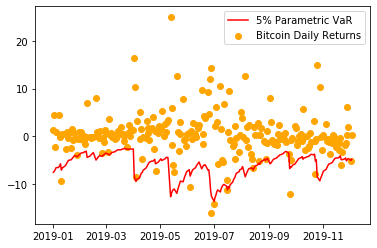

In [117]:
nu = [bitcoin_gm_result.params[4]]

# Obtain the parametric quantile
q_parametric = bitcoin_gm.distribution.ppf(0.05, [nu])
print('5% parametric quantile: ', q_parametric)
    
# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index = variance_forecast.index)

# Plot the VaR
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

Pay attention to the dots that fell below the VaR threshold. For 5% VaR there are less than 13 exceedances observed over 1 year, so the model is doing a decent job.

The difference between parametric VaR and empirical VaR is how the quantiles are estimated. The parametric approach estimates quantiles from an assumed distribution assumption, while the empirical approach estimates quantiles from an observed distribution of the standardized residuals.

You will use the same GARCH model as the previous exercise. The mean and variance forecasts are saved in `mean_forecast` and `variance_forecast` respectively. The empirical standardized residuals have also been calculated and saved in `bitcoin_std_resid`.

5% empirical quantile:  -1.566709351837459


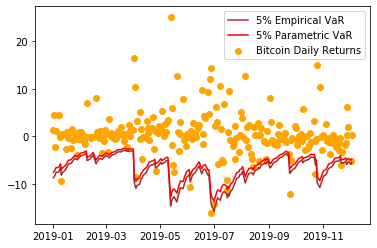

In [128]:
bitcoin_std_resid = bitcoin_gm_result.resid / bitcoin_gm_result.conditional_volatility
bitcoin_std_resid = bitcoin_gm_std_resid[:'2019-01-01']

# Obtain the empirical quantile
q_empirical = bitcoin_std_resid.quantile(.05)
print('5% empirical quantile: ', q_empirical)

# Calculate the VaR
VaR_empirical = mean_forecast.values + np.sqrt(variance_forecast).values * q_empirical
# Save VaR in a DataFrame
VaR_empirical = pd.DataFrame(VaR_empirical, columns = ['5%'], index = variance_forecast.index)

# Plot the VaRs
plt.plot(VaR_empirical, color = 'brown', label = '5% Empirical VaR')
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

Overall both VaRs are very close, but the empirical VaRs have bigger loss estimations, which implies VaRs based on the theoretical Student’s t-distribution assumption may underestimate the downside risks.

#### Dynamic covariance in portfolio optimisation

Covariance is a statistical tool used to determine the relationship of movement between two variables. In finance, the variables can be price returns of different assets. Covariance is used in various areas in portfolio management.

A positive covariance means the two asset prices tend to move in the same direction. E.g., when the European economy was recovering, Euros and British pounds appreciated in value simultaneously. Similarly, a negative covariance means the asset prices tend to move in the opposite direction. E.g., when the economy was slowing down, stock prices were going down and fixed income asset prices were rising as people moved towards safer assets like government treasuries.

GARCH models incorporate the time-varying characteristic of volatility into consideration and hence can be used to compute the dynamic covariance. Dynamic covariance can be computed by multiplying correlation coefficient $\rho$ between asset returns by their time-varying volatility from GARCH models $\sigma_1$ and $\sigma_2$:  
`dynamic_covariance = correlation * garch_vol1 * garch_vol2`

In Python:
Suppose we have two foreign currency assets Euro and Canadian dollars and their returns time series data have been fitted by two GARCH models `eur_gm_result` and `cad_gm_result`.  

1. Fit GARCH models and obtain volatility estimations for each return series:  
`vol_eur = eur_gm_result.conditional_volatility
vol_cad = cad_gm_result.conditional_volatility`

2. Compute standardised residuals from the fitted GARCH models:  
`std_resid_eur = eur_gm_result.resid / vol_eur
std_resid_cad = cad_gm_result.resid / vol_cad`

3. Compute the correlation coeffecient $\rho$ as a simple correlation of standardised residuals:  
`corr = np.corrcoef(std_resid_eur, std_resid_cad)[0,1]`

4. Compute GARCH covariance by multiplying the correlation and volatility:  
`covariance = corr * vol_eur * vol_cad`

#### Modern Portfolio Theory (MPT)

Modern Portfolio Theory (MPT) is a classic portfolio management theory pioneered by the Nobel Laureate Harry Markowitz in his 1952 paper "Portfolio Selection". In a nutshell, MPT states that there is an optimal way to structure a portfolio with various assets to take advantage of the diversification effect. The optimal portfolio can yield the maximum possible return with the minimum risk. In other words, an investor can construct a portfolio with multiple assets that will maximise returns for a given level of risk.

Likewise, given a desired level of expected return, an investor can construct an optimal portfolio with the minimum possible risk.

Suppose we have a simple portfolio of two assets $A_1$ and $A_2$ with respective weight $w_1$ and $w_2$. Then, the portfolio variance can be computed as follows:
$w_1 \times var(A_1) + w_2 \times var(A_2) + 2 \times w_1 \times w_2 cov(A_1, A_2)$

We should note that when combining assets into a portfolio, MPT shows that including assets with a negative covariance can reduce the overall risk of the portfolio. This is the Diversification Effect. In this sense, an individual asset's return is less important than how the asset behaves in relation to each other, or in the context of the entire portfolio.

Intuitively, normally stocks and bonds tend to move in the opposite directions. By investing in both, when the stock market goes down, bond prices rise and the overall portfolio won't suffer as much or will break even.

Last but not least, by incorporating GARCH models while computing the covariance, we can make more realistic estimations during the portfolio construction process.

In this exercise, you will practice computing dynamic covariance with GARCH models. Specifically you will use two foreign exchange time series data: EUR/USD and USD/CAD (shown in the plot). Their price returns have been fitted by two GARCH models, and the volatility estimates are saved in `vol_eur` and `vol_cad`. In addition, their standardized residuals are saved in `resid_eur` and `resid_cad` respectively.



In [ ]:
# Calculate correlation
corr = np.corrcoef(resid_eur, resid_cad)[0,1]
print('Correlation: ', corr)

# Calculate GARCH covariance
covariance =  corr * vol_eur * vol_cad

# Plot the data
plt.plot(covariance, color = 'gold')
plt.title('GARCH Covariance')
plt.show()



Notice the EUR/USD and USD/CAD rates tend to move in the opposite directions, so their dynamic covariance is negative and fluctuating over time.

In this exercise, you will practice computing the variance of a simple two-asset portfolio with GARCH dynamic covariance.

The Modern Portfolio Theory states that there is an optimal way to construct a portfolio to take advantage of the diversification effect, so one can obtain a desired level of expected return with the minimum risk. This effect is especially evident when the covariance between asset returns is negative.

Suppose you have a portfolio with only two assets: EUR/USD and CAD/USD currency pairs. Their variance from the GARCH models have been saved in `variance_eur` and `variance_cad`, and their covariance has been calculated and saved in `covariance`. Compute the overall portfolio variances by varying the weights of the two assets, and visualize their differences.

In [ ]:
# Define weights
Wa1 = .9
Wa2 = 1 - Wa1
Wb1 = .5
Wb2 = 1 - Wb1

# Calculate portfolio variance
portvar_a = Wa1**2 * variance_eur + Wa2**2 * variance_cad + 2*Wa1*Wa2 *covariance
portvar_b = Wb1**2 * variance_eur + Wb2**2 * variance_cad + 2*Wb1*Wb2*covariance

# Plot the data
plt.plot(portvar_a, color = 'green', label = 'Portfolio a')
plt.plot(portvar_b, color = 'deepskyblue', label = 'Portfolio b')
plt.legend(loc = 'upper right')
plt.show()



Portfolio b is much less volatile compared to portfolio a. Even just for a simple two-asset portfolio, how you structure it can greatly alter the risk profile.

#### Dynamic Beta in portfolio management

In finance, stock $\beta$ is a risk measure for an individual stock in relation to the general market. A stock $\beta$ measures the volatility of an individual stock in relation to the general market (for US stocks, the S&P 500 is a proxy for the general market). It measures the systematic risk which is the portion of the risk that cannot be reduce by diversification. In other words, it doesn't measure the risk of an investment asset held on a stand-alone basis but the amount of risk the investment adds to the portfolio.

In portfolio management, $\beta$ is a popular tool used to gauge investment risks of individual stocks in comparison with the general market.

$\beta$ is a gauge of investment risk with the beta of the market used as a benchmark with a value of 1.  
If $\beta > 1$, the stock bears more risks than the general market.  
If $\beta < 1$, the stock bears less risks than the general market.  
e.g., $\beta = 1.2$ implies that the stock is about 20% more volatile than the general stock market.

Stock $\beta$ is needed to compute the risk premium of an individual stock. The higher the $\beta$, the riskier the stock, and hence higher the required rate of return.

Capital Asset Pricing Model (CAPM), a classic model in portfolio management demonstarates how to determine the required rate of return of an investment asset.

$E(R_s) = R_f + \beta(E(R_m) - R_f)$, where  
- $E(R_s)$ is the required rate of return for the stock,
- $R_f$ is the risk-free rate (e.g., rate of return of government treasury bonds is a proxy),
- $E(R_m)$ is the expected rate of return of the market (e.g., S&P 500 rate of return is a proxy) and
- $\beta$ is the stock beta.

Note that $(E(R_m) - R_f)$ is called the market premium.

A stock's beta can be calculated as follows:
$$
\beta = \rho \times \dfrac{\sigma_{\text{stock}}}{\sigma_{\text{market}}},
$$
where $\rho$ is the correlation between stock returns and market returns.

Dynamic Beta can be computed with GARCH models to account for the time-varying characteristic of volatility/risks; the correlation and volatility are estimated from the GARCH model.


In Python:
1. Compute correlation between S&P 500 and stock:
`std_resid_stock = gm_result_stock.resid / gm_result_stock.conditional_volatility
std_resid_sp500 = gm_result_sp500.resid / gm_result_sp500.stock_volatility`

`correlation = np.corrcoef(std_resid_stock, std_resid_sp500)[0,1]`

2. Compute dynamic $\beta$ for the stock:  
`stock_beta = correlation * (gm_result_stock.conditional_volatility / gm_result_sp500.stock_volatility)`

Suppose Elon Musk is your idol and you are considering investing in some Tesla stocks. As a shrewd portfolio manager, you decide to do due diligence by checking Tesla stock Beta over the years. Beta is a measure of a stock's volatility in relation to the market, which can serve as a gauge of investment risks.

Recall you need the stock volatility, market (S&P 500 as a proxy) volatility and their return correlation to compute Beta. Correlation can be computed from standardized residuals.

Model fitted volatility has been preloaded for Tesla in `teslaGarch_vol`, and for S&P 500 in `spGarch_vol`. In addition, model standardized residuals are preloaded in `teslaGarch_resid` and `spGarch_resid` respectively.

In [ ]:
# Compute correlation between SP500 and Tesla
correlation = np.corrcoef(teslaGarch_resid, spGarch_resid)[0, 1]

# Compute the Beta for Tesla
stock_beta = coorelation * (teslaGarch_vol / spGarch_vol)

# Plot the Beta
plt.title('Tesla Stock Beta')
plt.plot(stock_beta)
plt.show()

Subsequent topics:

- Time series analysis
- ARIMA
- Capital Asset Pricing Model (CAPM)
- Portfolio Optimisation

From \text{https://www.investopedia.com/terms/g/generalalizedautogregressiveconditionalheteroskedasticity.asp}

The general process for a GARCH model involves three steps. The first is to estimate a best-fitting autoregressive model. The second is to compute autocorrelations of the error term. The third step is to test for significance.

Two other widely used approaches to estimating and predicting financial volatility are the classic historical volatility (VolSD) method and the exponentially weighted moving average volatility (VolEWMA) method.

https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity